In [2]:
# ! pip install openpyxl

In [6]:
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx"

df = pd.read_excel(url)


In [4]:
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


# Nulo

In [7]:
# Reemplazar los valores nulos en la columna "Description" por "DESCONOCIDO"
df['Description'].fillna('DESCONOCIDO', inplace=True)
df

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  
0      2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2      2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
...                    ...        ...         ...             ...  
541904 2011-12-09 12:50:00       0.85     12680.0          France  
541905 2011-12-09 12:50:00       2.10     12680.0          France  
541906 2011-12-09 12:50:00       4.15     12680.0          France  
541907 2011-12-09 12:50:00       4.15     12680.0          France  
541908 2011-12-09 12:50:00       4.95     12680.0          France  

[541909 rows x 8 columns]

# Consistencia de Datos

In [9]:
# Eliminar las transacciones que tienen valores negativos en la columna "Quantity"
df = df[df['Quantity'] > 0]
df

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  
0      2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2      2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
...                    ...        ...         ...             ...  
541904 2011-12-09 12:50:00       0.85     12680.0          France  
541905 2011-12-09 12:50:00       2.10     12680.0          France  
541906 2011-12-09 12:50:00       4.15     12680.0          France  
541907 2011-12-09 12:50:00       4.15     12680.0          France  
541908 2011-12-09 12:50:00       4.95     12680.0          France  

[531285 rows x 8 columns]

# Ingenieria de Datos

In [11]:

# Agregar una columna para el valor total de la transacción
df['Total'] = df['Quantity'] * df['UnitPrice']

# Agregar una columna para el mes de la transacción
df['Month'] = df['InvoiceDate'].dt.month

# Agregar una columna para el día de la semana de la transacción
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek
df

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  Total  \
0      2010-12-01 08:26:00       2.55     17850.0  United Kingdom  15.30   
1      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  20.34   
2      2010-12-01 08:26:00       2.75     17850.0  United Kingdom  22.00   
3      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  20.34   
4      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  20.34   
...                    ...        ...         ...             ...    ...   
541904 2011-12-09 12:50:00       0.85     12680.0          France  10.20   
541905 2011-12-09 12:50:00       2.10     12680.0          France  12.60   
541906 2011-12-09 12:50:00       4.15     12680.0          France  16.60   
541907 2011-12-09 12:50:00       4.15     12680.0          France  16.60   
541908 2011-12-09 12:50:00       4.95     12680.0          France  14.85   

        Month  DayOfWeek  
0          12          2  
1          12          2  
2          12          2  
3          12          2  
4          12          2  
...       ...        ...  
541904     12          4  
541905     12          4  
541906     12          4  
541907     12          4  
541908     12          4  

[531285 rows x 11 columns]

In [12]:
df.describe()

Quantity      UnitPrice     CustomerID         Total  \
count  531285.000000  531285.000000  397924.000000  531285.00000   
mean       10.655262       3.857296   15294.315171      20.03550   
std       156.830323      41.810047    1713.169877     270.91237   
min         1.000000  -11062.060000   12346.000000  -11062.06000   
25%         1.000000       1.250000   13969.000000       3.75000   
50%         3.000000       2.080000   15159.000000       9.90000   
75%        10.000000       4.130000   16795.000000      17.70000   
max     80995.000000   13541.330000   18287.000000  168469.60000   

               Month      DayOfWeek  
count  531285.000000  531285.000000  
mean        7.560244       2.435561  
std         3.508717       1.849816  
min         1.000000       0.000000  
25%         5.000000       1.000000  
50%         8.000000       2.000000  
75%        11.000000       4.000000  
max        12.000000       6.000000

# Visualizaciones

Transacciones por país


/tmp/ipykernel_64977/210698008.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  countries = df.groupby('Country').sum()[


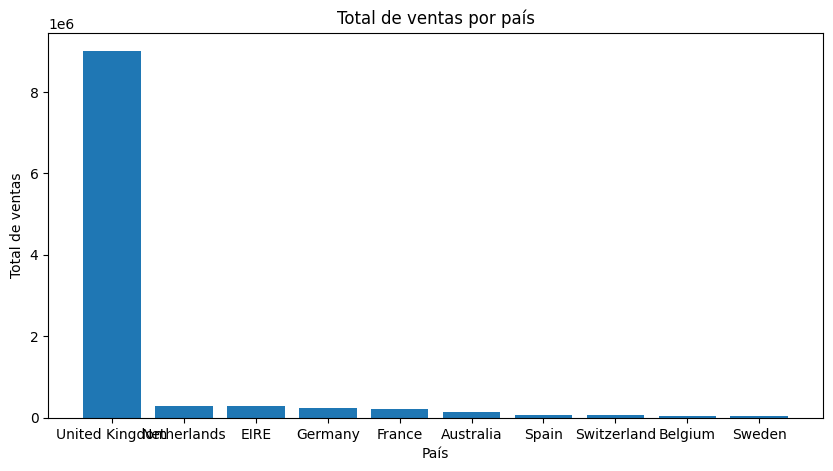

In [13]:
# Visualizar los datos de las transacciones por país
countries = df.groupby('Country').sum()[
    'Total'].sort_values(ascending=False)[:10]
plt.figure(figsize=(10, 5))
plt.title('Total de ventas por país')
plt.ylabel('Total de ventas')
plt.xlabel('País')
plt.bar(countries.index, countries.values)
plt.show()


Transacciones por mes

/tmp/ipykernel_64977/4055147850.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  months = df.groupby('Month').sum()['Total']


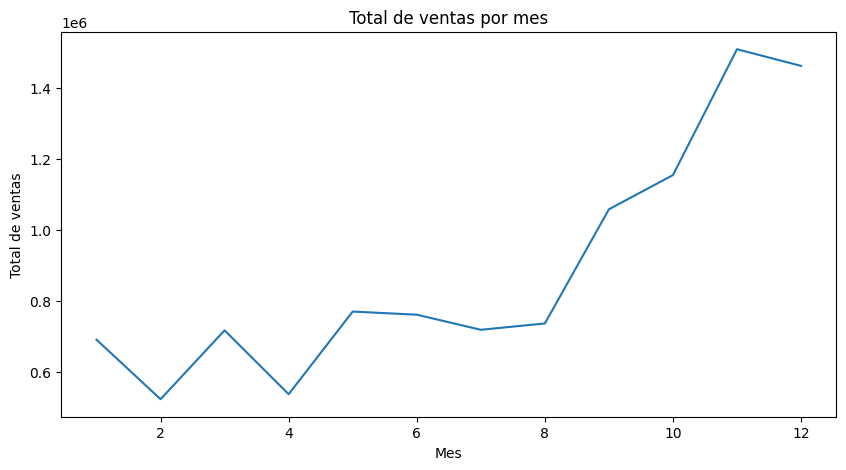

In [14]:
# Visualizar los datos de las transacciones por mes
months = df.groupby('Month').sum()['Total']
plt.figure(figsize=(10, 5))
plt.title('Total de ventas por mes')
plt.ylabel('Total de ventas')
plt.xlabel('Mes')
plt.plot(months.index, months.values)
plt.show()


Transacciones por día de la semana

Vas a experimentar un error, encuentra la forma de arreglarlo 

In [22]:

# Visualizar los datos de las transacciones por día de la semana
days = ['Lunes', 'Martes', 'Miércoles',
        'Jueves', 'Viernes', 'Sábado', 'Domingo']
dayofweek = df.groupby('DayOfWeek').sum()['Total']
# dayofweek.index = days
# plt.figure(figsize=(10, 5))
# plt.title('Total de ventas por día de la semana')
# plt.ylabel('Total de ventas')
# plt.xlabel('Día de la semana')
# plt.bar(dayofweek.index, dayofweek.values)
# plt.show()


/tmp/ipykernel_64977/2367882055.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dayofweek = df.groupby('DayOfWeek').sum()['Total']
